In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
#Non Racist/Sexist Tweets
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
#Racist/Sexist Tweets
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [5]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
#~7% racist/sexist and ~93% non-racist/sexist labels
#Imbalanced Classification challenge

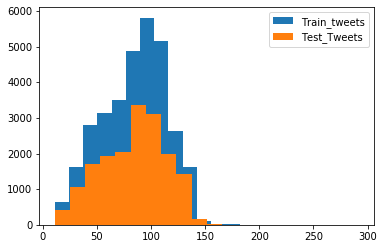

In [8]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label= "Train_tweets")
plt.hist(length_test, bins=20, label= "Test_Tweets")
plt.legend()
plt.show()

In [9]:
combi = train.append(test, ignore_index= True)
combi.shape

(49159, 3)

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [11]:
#1: Removing Twitter Handles(@user)

combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
#2: Remove Punctuations, Numbers, Special Characters

combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [13]:
#3 removing Short Words

combi['tidy_tweet'] = combi["tidy_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [14]:
#4: Text Normalization

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #Tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [15]:
#Normalize the tokenized tweets

from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #Stemming

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

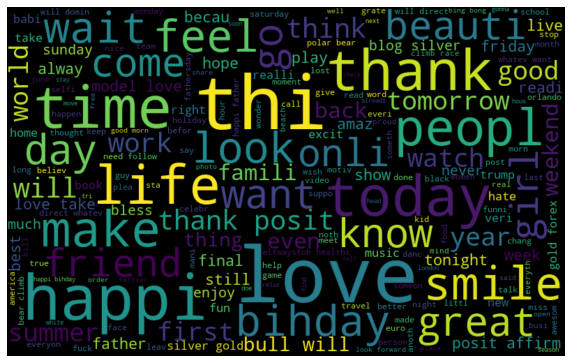

In [16]:
#A) Understanding the common words used in the tweet: WordCloud

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
!pip install wordcloud

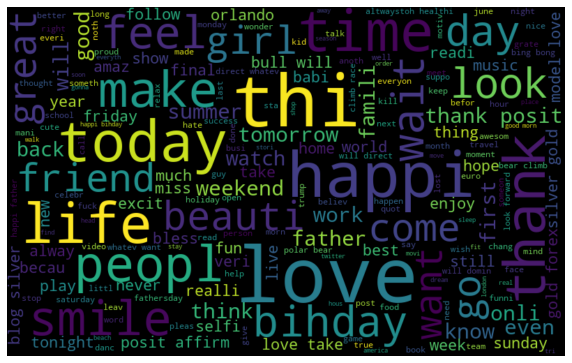

In [18]:
# B) Words in non racist/sexist tweets

normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

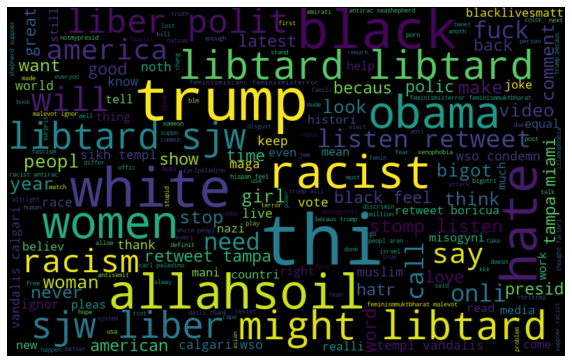

In [19]:
# C) Racist/Sexist Tweets

negetive_words = " ".join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud = WordCloud(width = 800, height= 500, random_state=21, max_font_size=100).generate(negetive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# D) Understanding the impact of hashtags on tweets sentiment
#Function to collect the hashtags

def hashtag_extract(x):
    hashtags = []
    #loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i )
        hashtags.append(ht)
    return hashtags

#extracting hashtags for non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])

#extracting hashtags for racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

#Unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


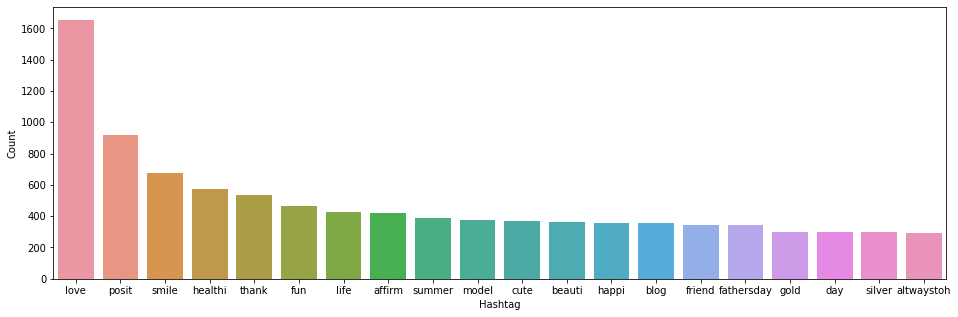

In [21]:
#Non-Racist/Sexist Tweet

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
#Selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x= "Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

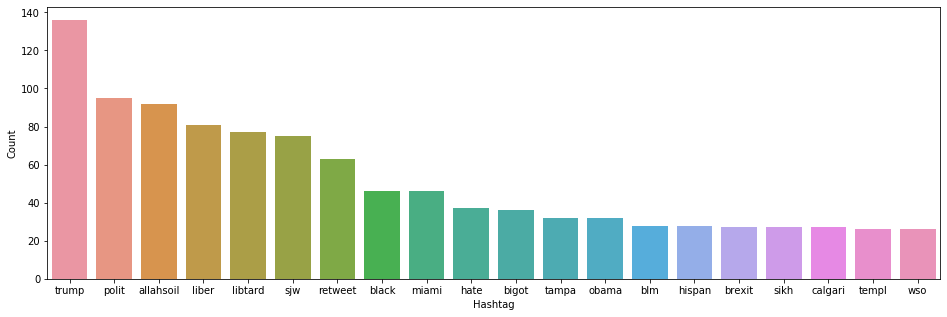

In [22]:
#Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
#Selecting top 20 most frequent hashtags
e = e.nlargest(columns='Count', n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x= "Hashtag", y ="Count")
ax.set(ylabel='Count')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [24]:
#!pip install gensim

In [25]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

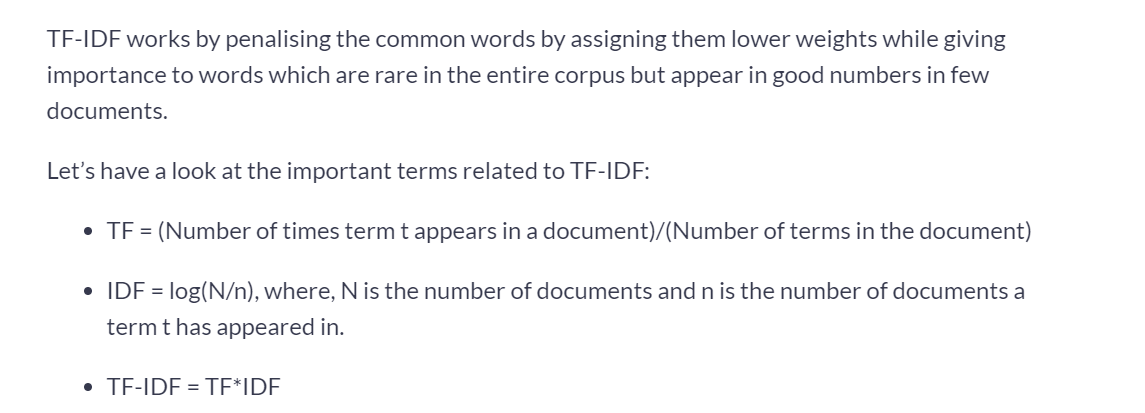

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

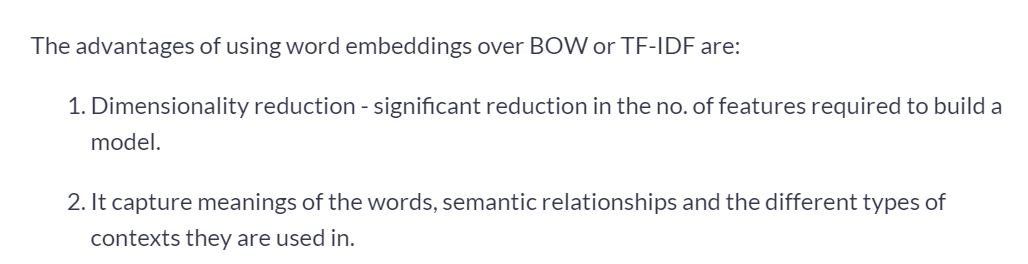

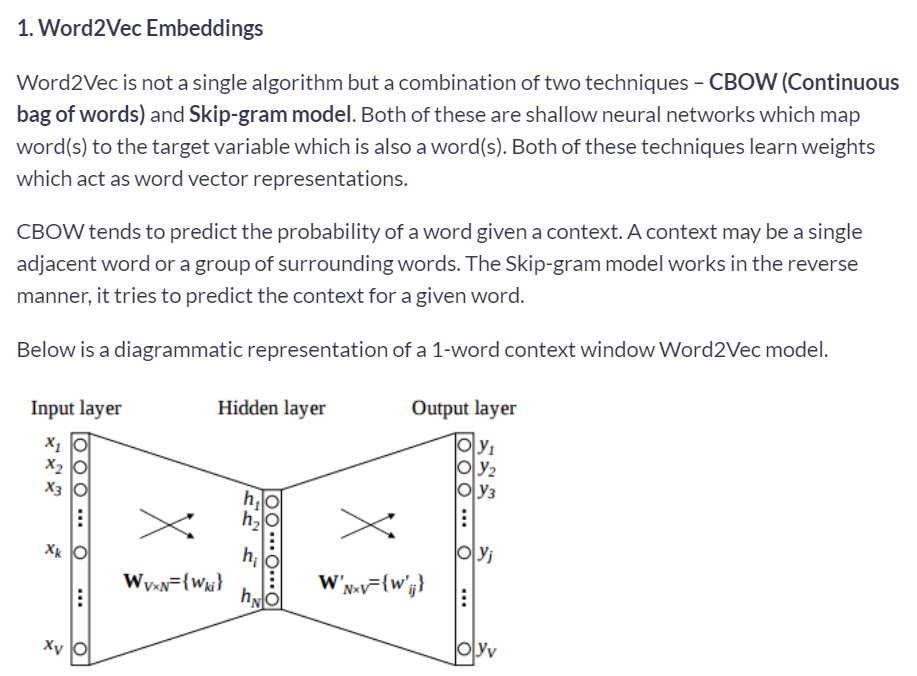

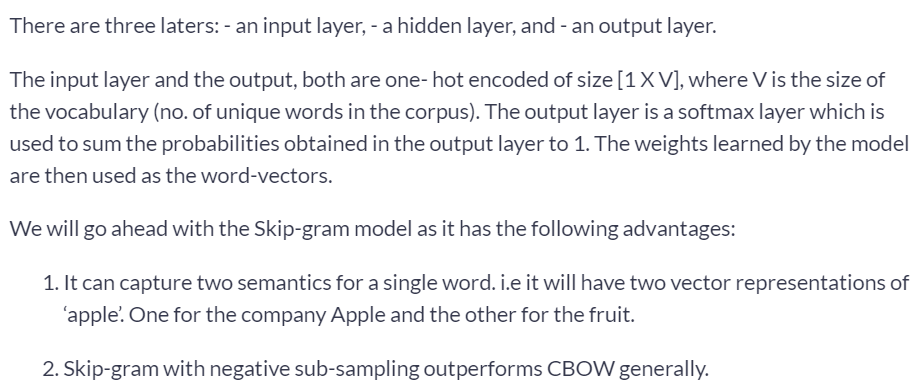

In [27]:
#Tokenizing
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
#size: desired no of features/independent variables; window=context window size, sg=1 for skip-gram model
#negative: for negative sampling; workers= number of cores
model_w2v = gensim.models.Word2Vec(tokenized_tweet, size=200, window = 5, min_count = 2, sg=1, hs=0,negative=10,
                                  workers = 2, seed = 34)
model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)


(6511119, 7536020)

In [28]:
model_w2v.wv.most_similar(positive='dinner')

[('spaghetti', 0.5713106393814087),
 ('#cellar', 0.5591641664505005),
 ('burrito', 0.5532151460647583),
 ('noodl', 0.5485004186630249),
 ('#avocado', 0.5462983250617981),
 ('spinach', 0.543734073638916),
 ('dess', 0.5388389825820923),
 ('#biall', 0.538726270198822),
 ('#burrito', 0.536224901676178),
 ('melani', 0.5359976887702942)]

In [29]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5975537300109863),
 ('phoni', 0.5496639013290405),
 ('potu', 0.5299545526504517),
 ('#delegaterevolt', 0.528448760509491),
 ('tomlin', 0.5274752974510193),
 ('melo', 0.5241730213165283),
 ('unstabl', 0.5214544534683228),
 ('unfavor', 0.5208866596221924),
 ('jibe', 0.5180323719978333),
 ('businessman', 0.515738844871521)]

In [30]:
model_w2v['food']

array([-1.0430117 ,  0.00192485, -0.23097274,  0.07632687,  0.54592854,
        0.13498043, -0.03749347, -0.2535221 , -0.19838552, -0.4954475 ,
        0.5893849 , -0.6312503 ,  0.15668873,  0.39274892,  0.40117797,
        0.8542887 ,  0.04811521, -0.16990268,  0.1564297 ,  0.1281911 ,
       -0.3910064 , -0.03031712,  0.29287732,  0.5504433 , -0.6839101 ,
        0.14872603, -0.11912662, -0.17724203, -0.10250019,  0.32809633,
        0.2737237 , -0.09470706, -0.29671875, -0.22894913, -0.53981054,
       -0.03428862, -0.21508981,  1.0937909 , -0.12588102, -0.3937812 ,
       -0.32200006,  0.09894665,  1.2174788 ,  0.6039227 , -0.43313614,
       -0.17158091, -0.02623446, -0.603651  , -0.5051826 ,  0.3304927 ,
       -0.256211  ,  0.48635304,  0.7034565 ,  0.12889151,  0.642222  ,
       -0.66580427,  0.06208348,  0.6733472 ,  0.00890548,  0.12747043,
       -0.53524673,  0.6061719 ,  0.3878993 , -0.3382781 ,  0.69152147,
        0.72299814, -0.44545272,  0.24769345,  0.6723502 ,  0.28

In [31]:
len(model_w2v['food'])

200

In [32]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError as e:
            continue
    if count != 0.:
        vec /= count
    return vec

In [33]:
wordvec_arrays =np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

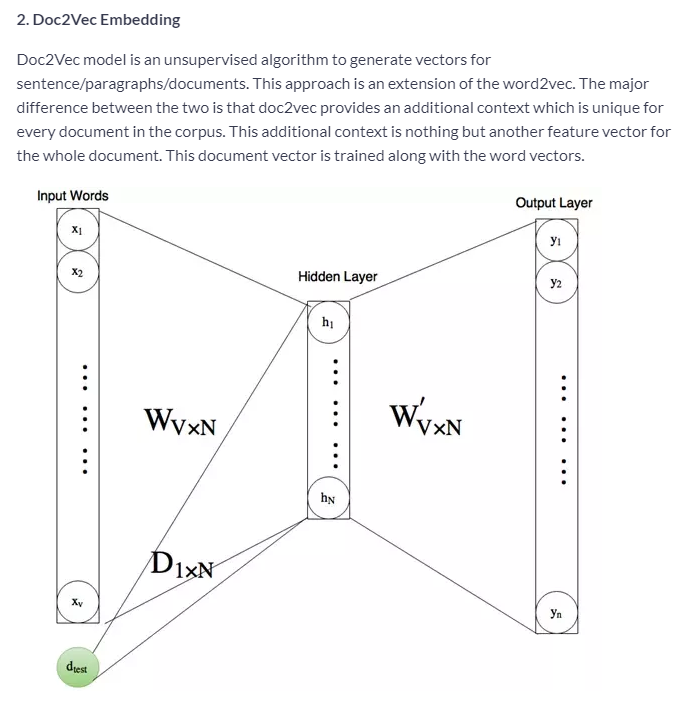

In [34]:
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [35]:
def add_label(twt):
    output = []
    for i,s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet)

In [36]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [37]:
#train doc2vec model
#dm = 1 for 'distributed memory' model
#dm_mean=1 for using mean of the context word vectors
#size: no of desired features
#window: width of the context window
#negative: if > 0, then negative sampling will be used
#min_count: ignore all words with total frequency lower than 2
#workers: no of cores
#alpha: learning rate

model_d2v = gensim.models.Doc2Vec(dm=1, dm_mean=1, size=200, window=5, negative=7, min_count=5, workers=3, alpha=0.1,
                                 seed=23, )

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 1710647.71it/s]


In [38]:
#preparing doc2vec feature set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
    docvec_arrays[i, :] = model_d2v.docvecs[i].reshape((1, 200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)


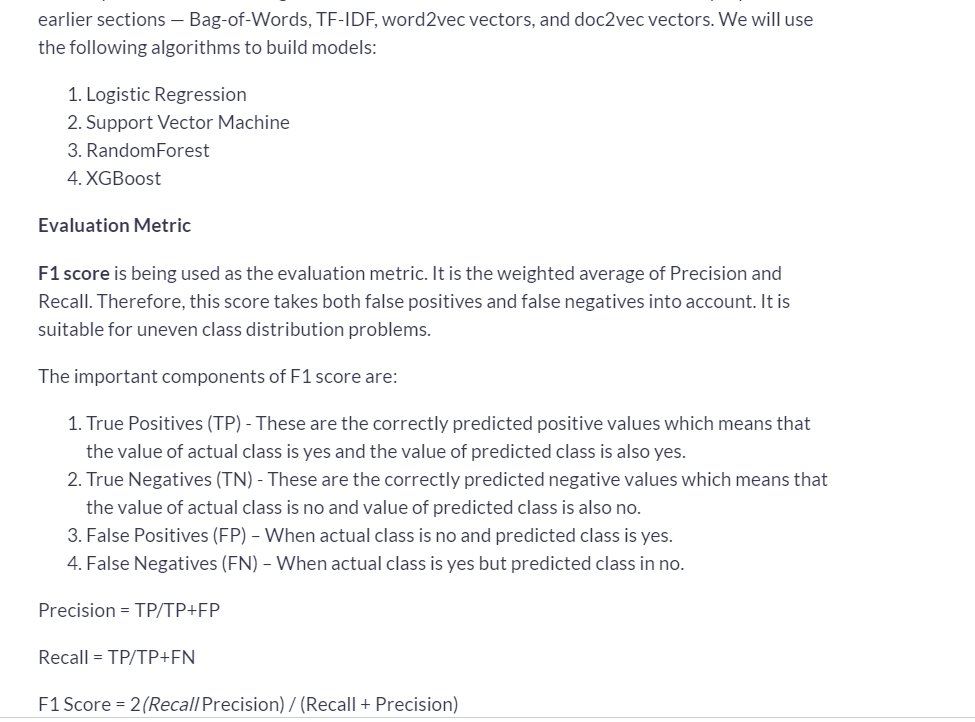

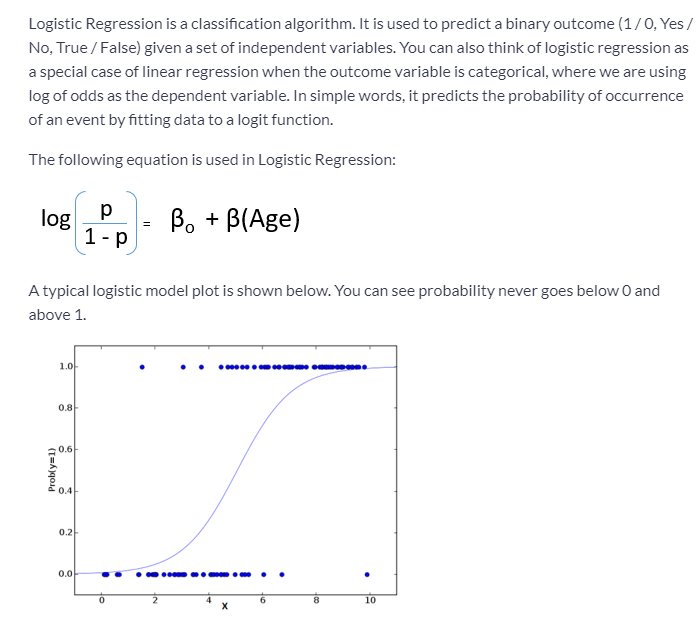

In [39]:
#Link : https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [41]:
#Bag-of-Words Features

#Extrating train and test BOW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

#Spilitting the data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size= 0.3)

lreg = LogisticRegression()

#Training the model
lreg.fit(xtrain_bow, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#predicting on the validation set
prediction = lreg.predict_proba(xvalid_bow)

#if prediction is greater than or equal to 0.3, then 1 else 0
prediction_int = prediction[:, 1]>= 0.3
prediction_int = prediction_int.astype(np.int)

#Calculating F1 score for the validation set
f1_score(yvalid, prediction_int)

0.5303408146300915

In [43]:
#Prediction on test data and creating submission file

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] > 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
#Writing data to csv file
submission.to_csv('sub_lreg_bow.csv', index=False)


In [44]:
#TF-IDF features

train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] >0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5451327433628319

In [45]:
#Word2vec features

train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df.iloc[31962:, :]
xtrain_w2v = train_w2v.iloc[ytrain.index, :]
xvalid_w2v = train_w2v.iloc[yvalid.index, :]
lreg.fit(xtrain_w2v, ytrain)
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] > 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6086956521739131

In [46]:
#Doc2vec features

train_d2v = docvec_df.iloc[:31962, :]
test_d2v = docvec_df.iloc[31962:, :]
xtrain_d2v = train_d2v.iloc[ytrain.index, :]
xvalid_d2v = train_d2v.iloc[yvalid.index, :]
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:, 1] > 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.36755823986194996

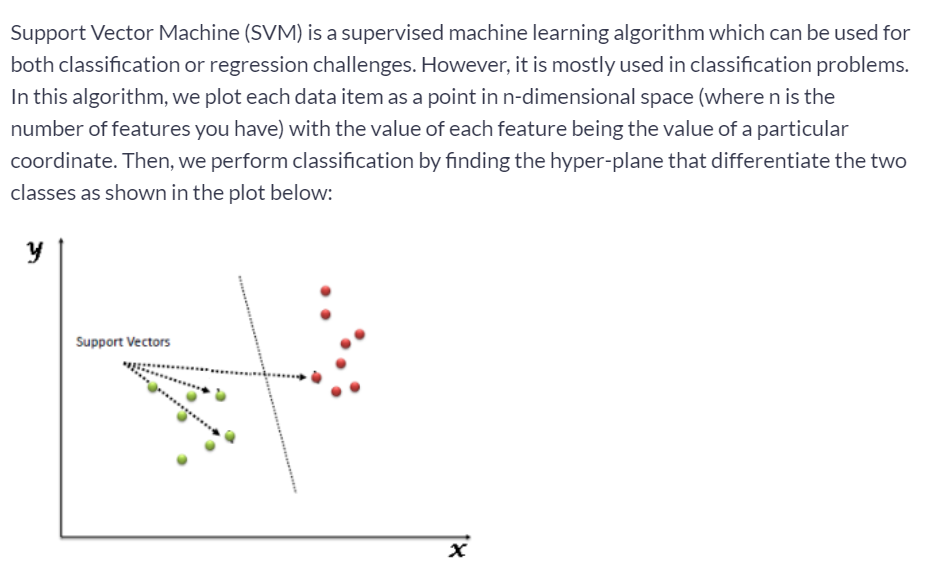

In [47]:
from sklearn import svm

In [48]:
#Bag of Word Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] > 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5051449953227315

In [49]:
#Creating submission file
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] > 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_svm_bow.csv', index=False)

In [50]:
#TF_IDF Features

svc = svm.SVC(kernel='linear', C=1, probability = True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] > 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5105215004574565

In [51]:
#Word2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] > 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.609984399375975

In [52]:
#Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)
prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:, 1] > 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.23660714285714285

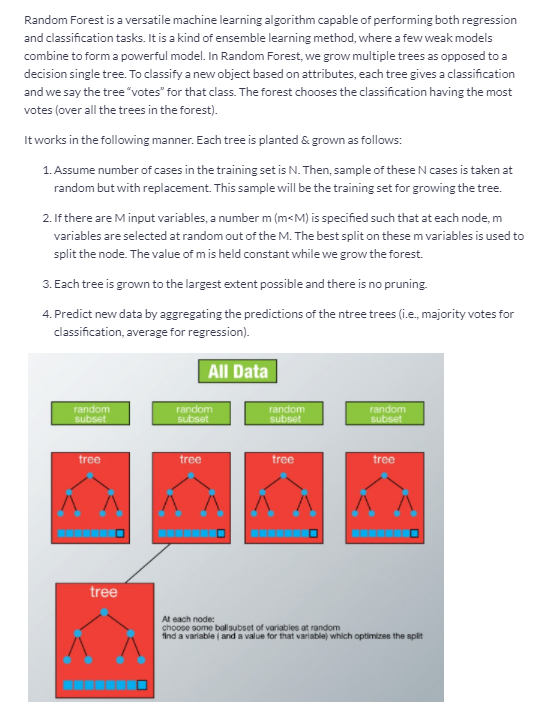

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
#Bag of word features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5529225908372828

In [55]:
#Create submission file
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id', 'label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [56]:
#TF-IDF features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.562152133580705

In [57]:
#Word2Vec Feature
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5197018104366347

In [58]:
#Doc2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.06779661016949151

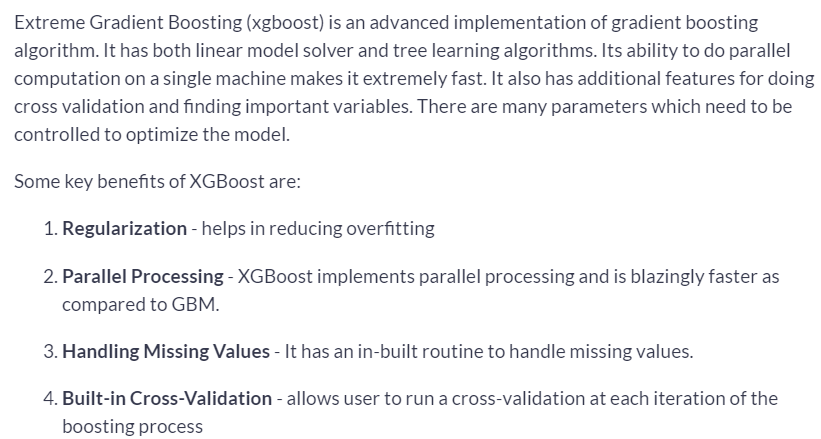

In [59]:
from xgboost import XGBClassifier

In [60]:
#!pip install xgboost

In [61]:
#Bag of Words Feature
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5247706422018349

In [62]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id', 'label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [63]:
#TF_IDF features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb_model.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5394265232974911

In [64]:
#Word2Vec Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_w2v, ytrain)
prediction = xgb_model.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6462093862815884

In [65]:
#Doc2Vec Features
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_d2v, ytrain)
prediction = xgb_model.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.33962264150943394